# The interplay between noise and chaos

In [79]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## What is noise?

**Noise** refers to the random variation of observed variables. For example, if we're measuring the intensity of a laser, our measurement will vary over time from 900 to 871 to 923 mW. This is noise. 

There are many types of noise. Some of it is due to fluctuations in the environment, like static on TV, while others are due to imperfections in the equipment, say a defect in the laser.

<img src="data/whitenoise.gif" width="200" height="200">

There is also a quantum brand of noise called shot noise. This happens due to the quantized nature of certain fundamental particles like electrons or photons. When measuring light intensity, only a whole number of photons can pass through. Suppose the light intensity shining through the laser is equivalent to 8.5 photons per second. Then each second, the intensity meter may measure 8 photons or 9 photons worth of intensity.

One common method of reducing noise to take more data. As we take more and more measurements, the final value we get will be more accurate. This makes sense as flipping a coin twice cannot determine its fairness, while flipping it a hundred times will give you a better idea.

## What is chaos?

**Chaos** happens when the properties of a system cause small differences in initial conditions to lead to drastically different situations. One example of a chaotic system is the weather. In the 1950s, mathematician Edward Lorenz attempted to model local weather based off computer simulations. He found that a tiny change in the current temperature or huidity, evendropping a decimal point off a number, could change the forecast from a sunny day to a thunderstorm. This led him to formulate the butterfly effect, noting that if a butterfly flaps their wings in China, it could cause a tornado in Texas.

The following graph depicts the Lorenz system, a model of a point moving through space. The graph shows the path of the particle through space. The equations that control the motion are chaotic and we begin to see many of the characteristic features in the 3d diagram. One such feature is so-called fractal structure. Fractals are patterns that look the same as you continue to zoom in on them. In the case of hte Lorenz system, this structure occurs at the intersection of the two "wings" of the graph. 

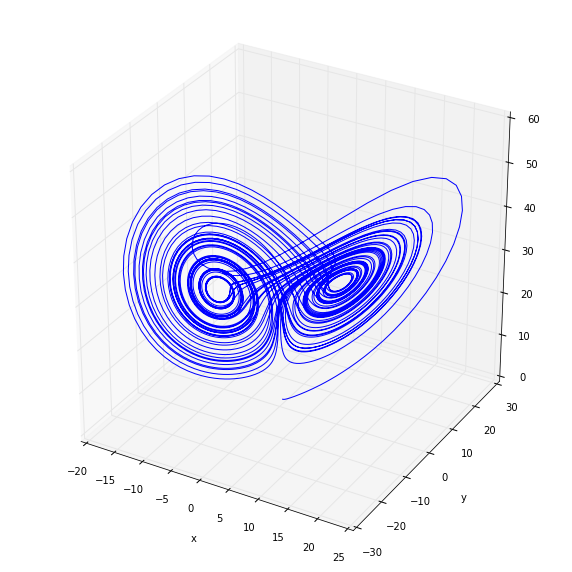

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

runsim = True

points = [[],[],[]]
pointsp = [[],[],[]]

x, y, z = 0, 1, 0
xp, yp, zp = 0, 1.000001, 0
dt = 0.01

def getlorenzevol(x, y, z):
    dx = (10 * (y - x)) * dt
    dy = (28 * x - y - x * z) * dt
    dz = (x * y - 8/3 * z) * dt
    
    x += dx
    y += dy
    z += dz 
    
    return x, y, z

t = 0
while runsim and len(points[0]) < 7000:
    x,y,z = getlorenzevol(x,y,z)
    xp, yp, zp = getlorenzevol(xp,yp,zp)
    
    points[0].append(x)
    points[1].append(y)
    points[2].append(z)
    pointsp[0].append(xp)
    pointsp[1].append(yp)
    pointsp[2].append(zp)
    t += dt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel("x")
plt.ylabel("y")
plt.plot(points[0],points[1],points[2])
plt.show(fig)

As shown in the following diagram, it is also apparent how quickly three points that start almost on top of each other very quickly move apart. At 2 seconds, they are still close together but fly apart by 3 seconds. As further time passes, the particles' movement does not show any similarity and it is impossible to predict where they will be.

In [83]:
from IPython.display import HTML
JS_FUNCTION = """
<script type="text/javascript">
  function interactUpdate(div){
     var outputs = div.getElementsByTagName("div");
     var controls = div.getElementsByTagName("input");

     var value = "";
     for(i=0; i<controls.length; i++){
       if((controls[i].type == "range") || controls[i].checked){
         value = value + controls[i].getAttribute("name") + controls[i].value;
       }
     }

     for(i=0; i<outputs.length; i++){
       var name = outputs[i].getAttribute("name");
       if(name == value){
          outputs[i].style.display = 'block';
       } else if(name != "controls"){
          outputs[i].style.display = 'none';
       }
     }
  }
</script>
"""
WIDGETS = """
<div>
 <input type="range" name="num" min="0" max="8", step="1" style="width:400px", oninput="interactUpdate(this.parentNode);" value="0">
<div name="num0", style="display:block">
   <img src="lorenz/lorenz0.png">
 </div>
<div name="num1", style="display:none">
   <img src="lorenz/lorenz1.png">
 </div>
 <div name="num2", style="display:none">
   <img src="lorenz/lorenz2.png">
 </div>
  <div name="num3", style="display:none">
   <img src="lorenz/lorenz3.png">
 </div>
  <div name="num4", style="display:none">
   <img src="lorenz/lorenz4.png">
 </div>
  <div name="num5", style="display:none">
   <img src="lorenz/lorenz5.png">
 </div>
  <div name="num6", style="display:none">
   <img src="lorenz/lorenz6.png">
 </div>
  <div name="num7", style="display:none">
   <img src="lorenz/lorenz7.png">
 </div>
  <div name="num8", style="display:none">
   <img src="lorenz/lorenz8.png">
 </div>
</div>
"""
HTML(JS_FUNCTION + WIDGETS)

## Our Experiment

Laser -> MZM -> Photon Counter -> FPGA
      |                              |
      \------<-----------<---------<-/

## How do they affect each other?

By adjusting the photon rate, we are in a unique position to adjust the noise level of the experiment. You can adjust the photon rate yourself with the slider!

What is being graphed right here is a horizontal slice of the 3D diagram (like the Lorenz diagram above). At low photon rates, we have a very noisy system (low number of samples). As we turn the photon rate up, we are lowering the noise and thus we begin to see the features of the system more clearly. If we effectively have infinite photons, we reach the deterministic limit, a system with no noise and pure chaos. 

In [82]:
NOISECHAOS = """
<div>
 Change the photon rate: <input type="range" name="num" min="1" max="10", step="1" style="width:400px", oninput="interactUpdate(this.parentNode);" value="1">
 <div name="num1", style="display:block">
   <img src="data/100.png">
 </div>
 <div name="num2", style="display:none">
   <img src="data/250.png">
 </div>
 <div name="num3", style="display:none">
   <img src="data/500.png">
 </div>
 <div name="num4", style="display:none">
   <img src="data/1000.png">
 </div>
 <div name="num5", style="display:none">
   <img src="data/2000.png">
 </div>
 <div name="num6", style="display:none">
   <img src="data/3200.png">
 </div>
 <div name="num7", style="display:none">
   <img src="data/5000.png">
 </div>
 <div name="num8", style="display:none">
   <img src="data/10000.png">
 </div>
 <div name="num9", style="display:none">
   <img src="data/20000.png">
 </div>
 <div name="num10", style="display:none">
   <img src="data/30000.png">
 </div> 
</div>
"""
HTML(JS_FUNCTION + NOISECHAOS)